In [46]:
import os
import math
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# California Extreme Precipitation Symposium
This analysis was completed for the 2019 CA Extreme Precipitation Symposium held at UC Davis on June 25, 2019. For this analysis 3 storms were selected from the "Baseline 2" dataset used in Tuolumne River Watershed Climate Vulnerability Assessement and Adaptation Planning Pilot Study. 

**These following 3 storm events were analyzed:**
1. *1997 Event* this event generates the largest inflow into Don Pedro in the 'Baseline 2' data. It is a synthetic version of the 1997 event occuring between 12-15 and 12-25.
2.  
3.
</br>

**Under the following 4 climate scenarios:**
1. Baseline 
2. +2C Warming
3. +2C Warming plus Clausius Clapeyron Scaling 
4. Baseline Initial Conditions with Warming and C-C Scaling during the Event 

The baseline condition is a no climate change experimental control. The 2 degrees of Celsius warming is uniformly applied to all time periods in the trace data. The Clausius-Clapeyron (C-C) scaling is applied as a +14% increase in precipitation associted for days exceeding 14mm of basin average precipitation. *NOTE: no cooresponding C-C decrease is applied to the lower end of the precipitation distribution.* The climate scenario with the baseline's initial conditions is meant to help disentangle the impact of changed intial conditions on the event level outcomes under climate change.

In [47]:
os.chdir("C:/Users/q0hecjrk/Documents/_Data/Tuolumne/cepsym/")

### 1. Event Dictionaries
These dictionaries allow us to efficiently toggle between events and scenarios </br> </br>
**a. 1997 Event Dictionaries**


In [48]:
#1. Baseline Scenario
_97_base =       { 'event': '1997', 'scenario': 'baseline', 'file': 'Sim82_Base.csv',\
                   'start': '2021-11-25', 'begin': '2021-12-15', 'end': '2021-12-25' }
#2. Warming Scenario
_97_2C =         { 'event': '1997', 'scenario': '+2C', 'file': 'Sim82_2c.csv',\
                   'start': '2021-11-25', 'begin': '2021-12-15', 'end': '2021-12-25' }
#3. Warming plus C-C Scaling Scenario
_97_2C_CC=       { 'event': '1997', 'scenario': '+2C_C-C', 'file': 'Sim82_2c_CC.csv',\
                   'start': '2021-11-25', 'begin': '2021-12-15', 'end': '2021-12-25' }
#4. Baseline Initital Conditions + Event Warming and C-C Scaling Scenario
_97_base_2C_CC = { 'event': '1997', 'scenario': 'baseline+2C_C-C', 'file': 'Sim82_2c_CC_HS.csv',\
                   'start': '2021-11-25', 'begin': '2021-12-15', 'end': '2021-12-25' }

### 2. Set Event for Analysis and Start & End Times

In [49]:
event_metadata = _97_base_2C_CC

In [50]:
start_date = pd.to_datetime(event_metadata['start'],format='%Y-%m-%d')
event_start_date = pd.to_datetime(event_metadata['begin'],format='%Y-%m-%d')
event_end_date = pd.to_datetime(event_metadata['end'],format='%Y-%m-%d')

### 3. Input and View Trace Data Precipitation

In [51]:
trace = pd.read_csv('traces/' + event_metadata['file'])
trace['DATE'] = pd.to_datetime(trace['DATE'],format='%Y-%m-%d')
trace = trace.rename(columns = {'DATE':'date'})
trace = trace.rename(columns = {'Watershed Total PRECIP-TAF':'precip-taf'})
trace = trace.rename(columns = {'Watershed Total Freeze PRECIP-TAF':'snow-taf'})
trace = trace.rename(columns = {'Watershed Average PRECIP-MM':'precip-mm'})
trace = trace.rename(columns = {'DNP_DONPEDRO_INFLOW AF':'inflow_unreg-af'})
trace = trace.rename(columns = {'Watershed Total SWE-TAF':'swe-taf'})

In [52]:
trace.set_index('date', inplace = True)
trace = trace[['precip-mm', 'precip-taf', 'snow-taf', 'swe-taf', 'inflow_unreg-af']]
trace['rain-taf'] = trace['precip-taf'] - trace['snow-taf']
trace.head()

,precip-mm,precip-taf,snow-taf,swe-taf,inflow_unreg-af,rain-taf
date,,,,,,
2019-10-01,0.0,0.0,0.0,0.0,234.066132,0.0
2019-10-02,0.0,0.0,0.0,0.0,241.591415,0.0
2019-10-03,0.0,0.0,0.0,0.0,237.607193,0.0
2019-10-04,0.0,0.0,0.0,0.0,231.727219,0.0
2019-10-05,0.0,0.0,0.0,0.0,224.373566,0.0


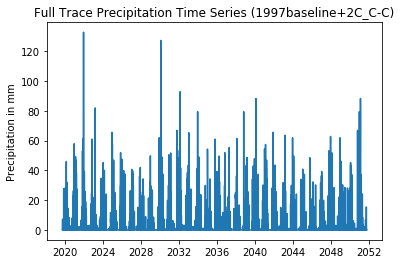

In [53]:
trace_precip_figure = plt.figure()
trace_precip_figure = plt.title('Full Trace Precipitation Time Series (' \
                                + event_metadata['event'] + event_metadata['scenario'] + ')')
trace_precip_figure = plt.ylabel("Precipitation in mm")
trace_precip_figure = plt.plot(trace.index, trace['precip-mm'])
plt.show()

### 4. Subset Trace Data to View Month Preceding the Event Data Precipitation

In [54]:
month_mask = (trace.index > start_date) & (trace.index <= event_end_date)
event_month = trace[month_mask]
event_month.head()

,precip-mm,precip-taf,snow-taf,swe-taf,inflow_unreg-af,rain-taf
date,,,,,,
2021-11-26,0.624840,2.690333,0.854695,196.930412,2941.080322,1.835638
2021-11-27,0.000000,0.000000,0.000000,194.287339,2897.163330,0.000000
2021-11-28,0.000000,0.000000,0.000000,190.168854,2901.592285,0.000000
2021-11-29,0.000000,0.540340,0.000000,183.145141,3010.466797,0.540340
2021-11-30,5.325871,21.257421,2.598493,184.396755,3168.954834,18.658927


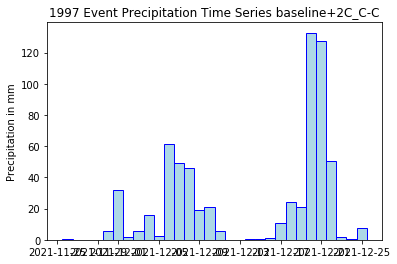

In [55]:
event_month_precip_figure = plt.figure()
event_month_precip_figure = plt.title(event_metadata['event'] + ' Event Precipitation Time Series ' + event_metadata['scenario'])
event_month_precip_figure = plt.ylabel('Precipitation in mm')
event_month_precip_figure = plt.bar(event_month.index, event_month['precip-mm'], width = 1, facecolor = 'lightblue', edgecolor = 'blue')
plt.show()

*Rain and Snow breakdown*

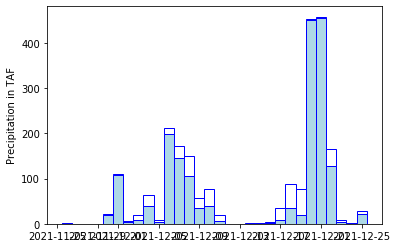

In [56]:
event_month_precip_ratio_figure = plt.figure()
#event_precipratio_figure = plt.title(event_name + ' Precipitation Time Series' + '(' + scenario + ')')
event_month_precip_ratio_figure = plt.ylabel("Precipitation in TAF")
event_month_precip_ratio_figure = plt.bar(event_month.index, event_month['rain-taf'], width = 1, facecolor = 'lightblue', edgecolor = 'blue')
event_month_precip_ratio_figure = plt.bar(event_month.index, event_month['snow-taf'], bottom = event_month['rain-taf'], width = 1, facecolor = 'white', edgecolor = 'blue')
event_month_precip_ratio_figure = plt.savefig('figures/' + 'precip_' + event_metadata['event'] + event_metadata['scenario'] + '.png', bbox_inches='tight')
plt.show()

### 5. Subset to Event

In [57]:
event_mask = (trace.index > event_start_date) & (trace.index <= event_end_date)
event = trace[event_mask]
event.head()

,precip-mm,precip-taf,snow-taf,swe-taf,inflow_unreg-af,rain-taf
date,,,,,,
2021-12-16,1.170432,4.211772,3.038491,539.194204,9795.707031,1.173281
2021-12-17,10.746029,34.752370,25.348581,562.122102,9256.348633,9.403789
2021-12-18,24.043171,88.397548,54.371106,624.386605,8992.731445,34.026442
2021-12-19,21.298061,76.899979,58.324970,683.990687,8544.591797,18.575008
2021-12-20,132.735474,453.492079,3.975235,677.331749,76047.039062,449.516843


In [58]:
event_rain_total = sum(event['rain-taf'])
event_snow_total = sum(event['snow-taf'])
event_inflow_total = sum(event['inflow_unreg-af']) / 1000
rain_portion = event_rain_total / (event_rain_total + event_snow_total)
snow_portion = event_snow_total / (event_rain_total + event_snow_total)
print('portion rain: ' + str(rain_portion))
print('portion snow: ' + str(snow_portion))
print('total rain: ' + str(event_rain_total))
print('total snow: ' + str(event_snow_total))
print('inflow: ' + str(event_inflow_total))

portion rain: 0.8513465636229435
portion snow: 0.14865343637705647
total rain: 1121.9989353705607
total snow: 195.91198752768165
inflow: 748.26689453125


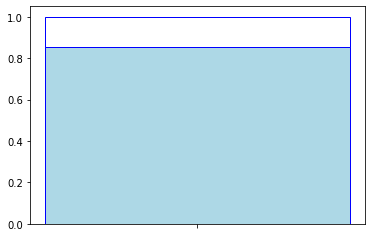

In [59]:
event_precip_ratio_figure = plt.bar('', rain_portion, width = 1, facecolor = 'lightblue', edgecolor = 'blue')
event_precip_ratio_figure = plt.bar('', snow_portion, bottom = rain_portion, width = 1, facecolor = 'white', edgecolor = 'blue')

In [60]:
event.to_csv('event_comparisons/' + event_metadata['event'] + 'Event_' + event_metadata['scenario'] + '.csv' )

## This analysis is continued on the notebook titled Event_Comparison...